<a href="https://colab.research.google.com/github/AmirJlr/Graphs/blob/master/01_knowledge_graphs_using_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Knowledge Graph Tutorial


## What is a Knowledge Graph?
-------------------------
### A knowledge graph is a way to represent information using nodes (entities) and edges (relationships).

### Think of it as connecting dots (nodes) with lines (edges) where:
- ### Nodes represent concepts, topics, or things
- ### Edges represent how these nodes are related to each other

In [1]:
# First, install required packages
!pip install networkx pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.3 MB/s eta 0:00:00


### NetworkX provides different graph classes for different needs Start by importing networkx with alias 'nx' Choose the appropriate graph type for your use case We'll use DiGraph for our learning path example

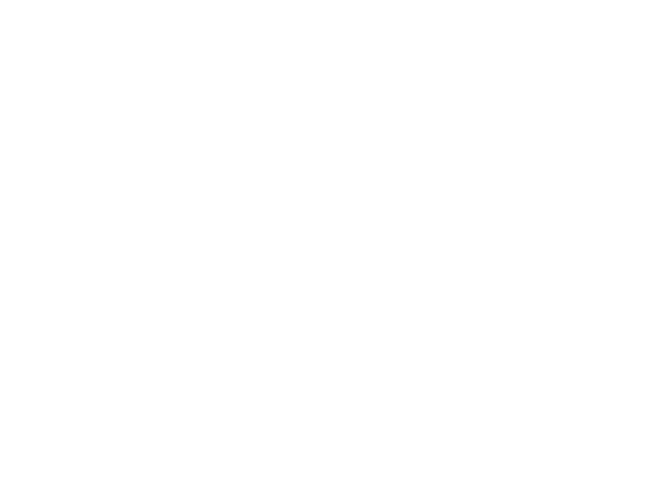

In [2]:
import networkx as nx
from matplotlib import pyplot as plt

# Create different types of graphs
G = nx.Graph()              # Undirected graph
DG = nx.DiGraph()           # Directed graph

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos)
plt.show()

### Nodes can be added individually or in groups Edges connect existing nodes Can add metadata to both nodes and edges Show how to build graph incrementally

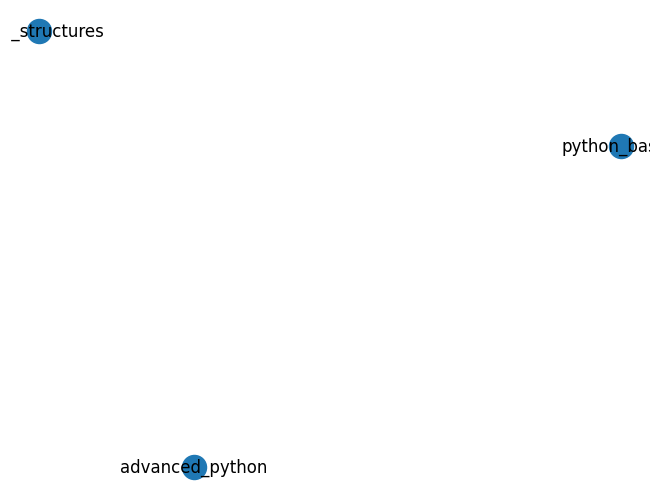

In [5]:
# Adding nodes
G.add_node('python_basics')

G.add_nodes_from(['data_structures', 'advanced_python'])

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

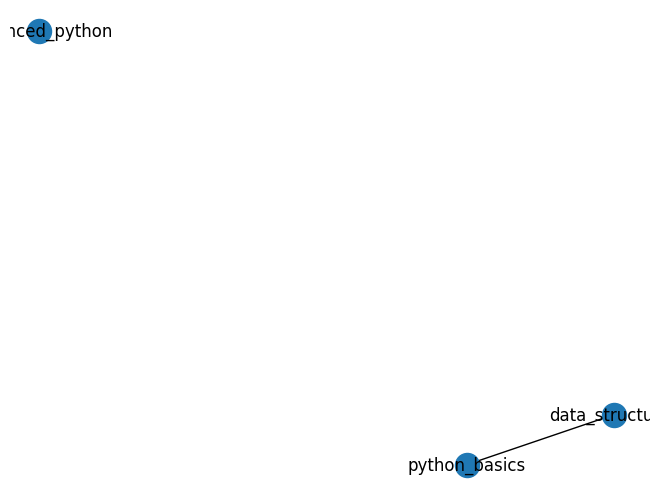

In [6]:
# Adding edges
G.add_edge('python_basics', 'data_structures')

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

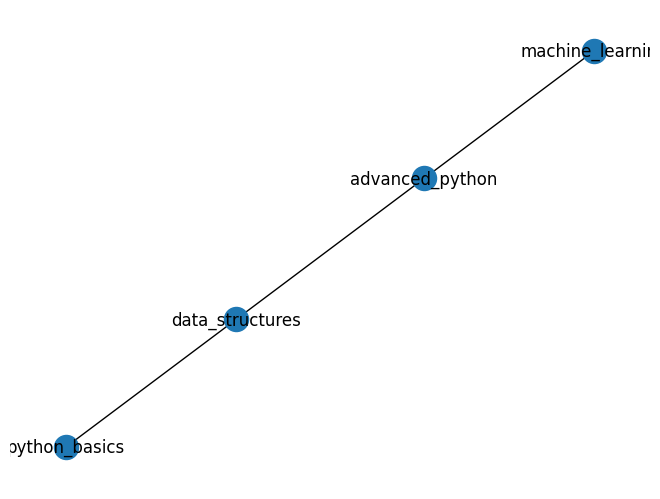

In [7]:

G.add_edges_from([
    ('data_structures', 'advanced_python'),
    ('advanced_python', 'machine_learning')
])

# Basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

### Attributes make a graph into a knowledge graph Can add any type of metadata Attributes can be added during or after creation Makes graph more meaningful and useful

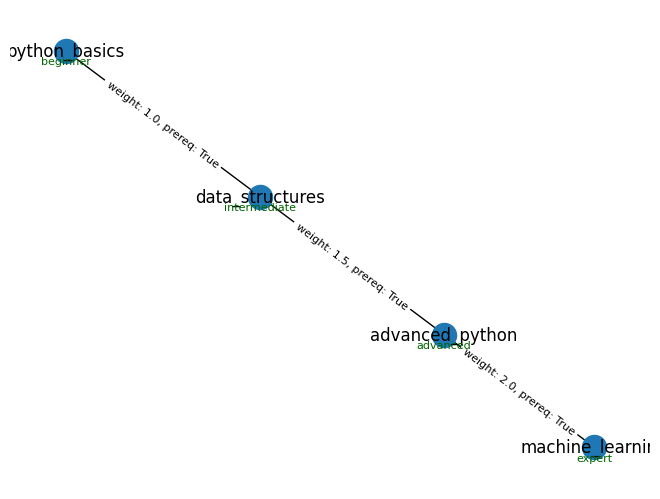

In [8]:
### Add Context to the Graph ###

# Node attributes
topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Data structures in Python'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python techniques'},
    'machine_learning': {'difficulty': 'expert', 'description': 'Introduction to ML'}
}

for node, attrs in topics.items():
    G.nodes[node].update(attrs)

# Edge attributes
edge_attributes = {
    ('python_basics', 'data_structures'): {'weight': 1.0, 'prerequisite': True},
    ('data_structures', 'advanced_python'): {'weight': 1.5, 'prerequisite': True},
    ('advanced_python', 'machine_learning'): {'weight': 2.0, 'prerequisite': True}
}

for edge, attrs in edge_attributes.items():
    G.edges[edge].update(attrs)

# Visualization
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True)

# Add node attributes with an offset
node_labels = {node: data['difficulty'] for node, data in G.nodes(data=True)}
for node, (x, y) in pos.items():
    plt.text(x, y - 0.05, node_labels[node], fontsize=8, ha='center', color='darkgreen')

# Add edge attributes as labels
edge_labels = {(u, v): f"weight: {d['weight']}, prereq: {d['prerequisite']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()

## Let us build a learning path

### This is our complete learning path example Shows how to organize data before creating graph Demonstrates proper structure for large graphs Notice how metadata makes relationships meaningful

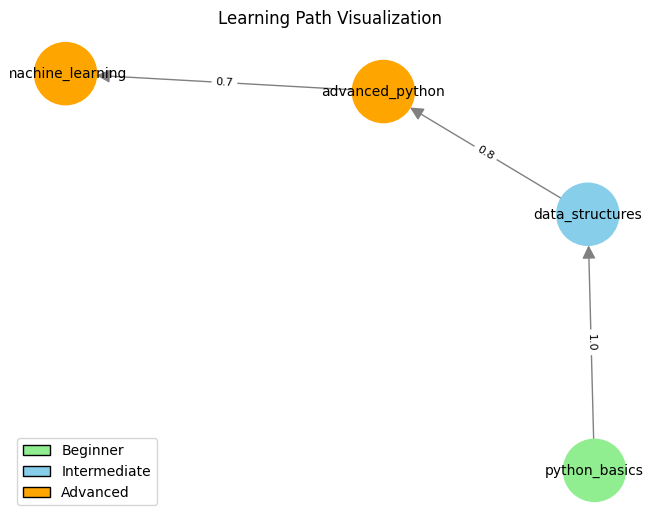

In [9]:
# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7})
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)

G.add_edges_from(relationships)

# Define positions for nodes
pos = nx.spring_layout(G)

# Draw nodes with colors based on difficulty
node_colors = {
    'beginner': 'lightgreen',
    'intermediate': 'skyblue',
    'advanced': 'orange'
}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

nx.draw(
    G, pos, with_labels=True, node_color=node_color_list,
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
)

# Add edge labels to show weights
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Add a legend for node colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='lightgreen', edgecolor='black', label='Beginner'),
    Patch(facecolor='skyblue', edgecolor='black', label='Intermediate'),
    Patch(facecolor='orange', edgecolor='black', label='Advanced')
]
plt.legend(handles=legend_elements, loc='lower left')

plt.title("Learning Path Visualization", fontsize=12)
plt.show()


## Basic Graph Analysis

### NetworkX provides many analysis methods Start with basic metrics Understanding these helps with more complex analysis Show how to extract useful information

In [12]:
# Get basic information
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Get node neighbors
print(f"Neighbors of data_structures: {list(G.neighbors('data_structures'))}")

# Get node neighbors
print(f"Neighbors of machine_learning: {list(G.neighbors('machine_learning'))}")

# Get node degree
print(f"Degree of data_structures: {G.degree['data_structures']}")

Number of nodes: 4
Number of edges: 3
Neighbors of data_structures: ['advanced_python']
Neighbors of machine_learning: []
Degree of data_structures: 2


## Graph Algorithms

### These algorithms help analyze graph structure <br>

### **Shortest path** helps find prerequisites <br>
### **Centrality** identifies important topics <br>

### Many more algorithms available in NetworkX

Shortest Path 1 from 'python_basics' to 'machine_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
Shortest Path 2 from 'python_basics' to 'deep_learning': ['python_basics', 'data_structures', 'advanced_python', 'machine_learning', 'deep_learning']
Betweenness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}

--- Betweenness Centrality Explanation ---
Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.
Nodes with high betweenness centrality are important for connecting different parts of the graph, acting as bridges or intermediaries.
Is the graph connected? True


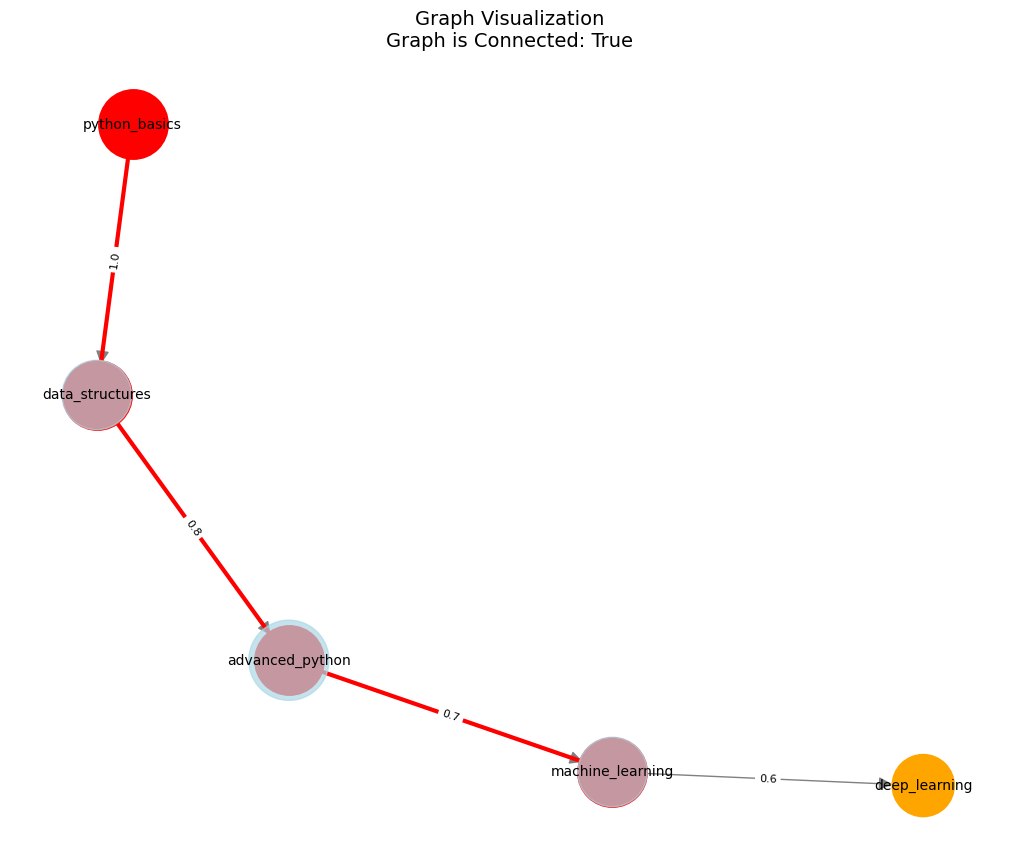

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)


### Find the shortest path (including another path for demonstration)
shortest_path_1 = nx.shortest_path(G, 'python_basics', 'machine_learning')
shortest_path_2 = nx.shortest_path(G, 'python_basics', 'deep_learning')

print(f"Shortest Path 1 from 'python_basics' to 'machine_learning': {shortest_path_1}")
print(f"Shortest Path 2 from 'python_basics' to 'deep_learning': {shortest_path_2}")

### Calculate betweenness centrality
centrality = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {centrality}")
print("\n--- Betweenness Centrality Explanation ---")
print("Betweenness centrality is a measure of a node's importance based on the number of shortest paths that pass through it.")
print("Nodes with high betweenness centrality are important for connecting different parts of the graph, acting as bridges or intermediaries.")

# Check if the graph is connected
is_connected = nx.is_connected(G.to_undirected())
print(f"Is the graph connected? {is_connected}")

# Define positions for nodes
pos = nx.spring_layout(G)

# Draw the basic graph with node colors based on difficulty
node_colors = {'beginner': 'lightgreen', 'intermediate': 'skyblue', 'advanced': 'orange'}
node_color_list = [node_colors[data['difficulty']] for _, data in G.nodes(data=True)]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_list,
    node_size=2000, font_size=10, arrowsize=20, edge_color='gray'
)

# Highlight the shortest paths with different colors
nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_1, node_color='red', node_size=2500)
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_1[i], shortest_path_1[i + 1]) for i in range(len(shortest_path_1) - 1)], edge_color='red', width=3)

# nx.draw_networkx_nodes(G, pos, nodelist=shortest_path_2, node_color='blue', node_size=2500)
# nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path_2[i], shortest_path_2[i + 1]) for i in range(len(shortest_path_2) - 1)], edge_color='blue', width=3)

# Add edge labels to show weights
edge_labels = {(u, v): f"{d['weight']}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Betweenness centrality - Adjust node size based on centrality
node_sizes = [v * 10000 for v in centrality.values()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', alpha=0.7)

# Add the title and explanation
plt.title(f"Graph Visualization\nGraph is Connected: {is_connected}", fontsize=14)

# Show the plot
plt.show()


## Storing Graph Data

Multiple storage options available <br>
Examples:<br>
NetworkX Native <br>
SQL Database <br>
Graph Databases (Neo4j, Amazon Neptune, ArangoDB) <br>

Choose based on:

Data size
Query requirements
Performance needs
Integration requirements


Graph databases are specialized for graph data
SQL can work for smaller graphs

In [18]:
# Save to GraphML(NetworkX native)
nx.write_graphml(G, "learning_path.graphml")

# Store in SQLite (Example only)
"""
cursor.execute('''
CREATE TABLE IF NOT EXISTS topics (
    id TEXT PRIMARY KEY,
    metadata TEXT
)
''')

"""

"\ncursor.execute('''\nCREATE TABLE IF NOT EXISTS topics (\n    id TEXT PRIMARY KEY,\n    metadata TEXT\n)\n''')\n\n"

## Advanced Graph Metrics

Centrality measures identify important nodes
Degree centrality: number of connections
Betweenness: bridge nodes between communities
Closeness: nodes that can reach others quickly
Different measures for different needs

Degree Centrality: {'python_basics': 0.25, 'data_structures': 0.5, 'advanced_python': 0.5, 'machine_learning': 0.5, 'deep_learning': 0.25}
Degree Centrality: Measures the number of edges connected to a node. Nodes with higher degree centrality are well-connected.
Betweenness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.25, 'deep_learning': 0.0}
Betweenness Centrality: Measures how often a node lies on the shortest path between two other nodes. High betweenness centrality indicates a node is a key bridge in the network.
Closeness Centrality: {'python_basics': 0.0, 'data_structures': 0.25, 'advanced_python': 0.3333333333333333, 'machine_learning': 0.375, 'deep_learning': 0.4}
Closeness Centrality: Measures how close a node is to all other nodes, based on the shortest paths. Higher closeness centrality means the node can reach others more quickly.


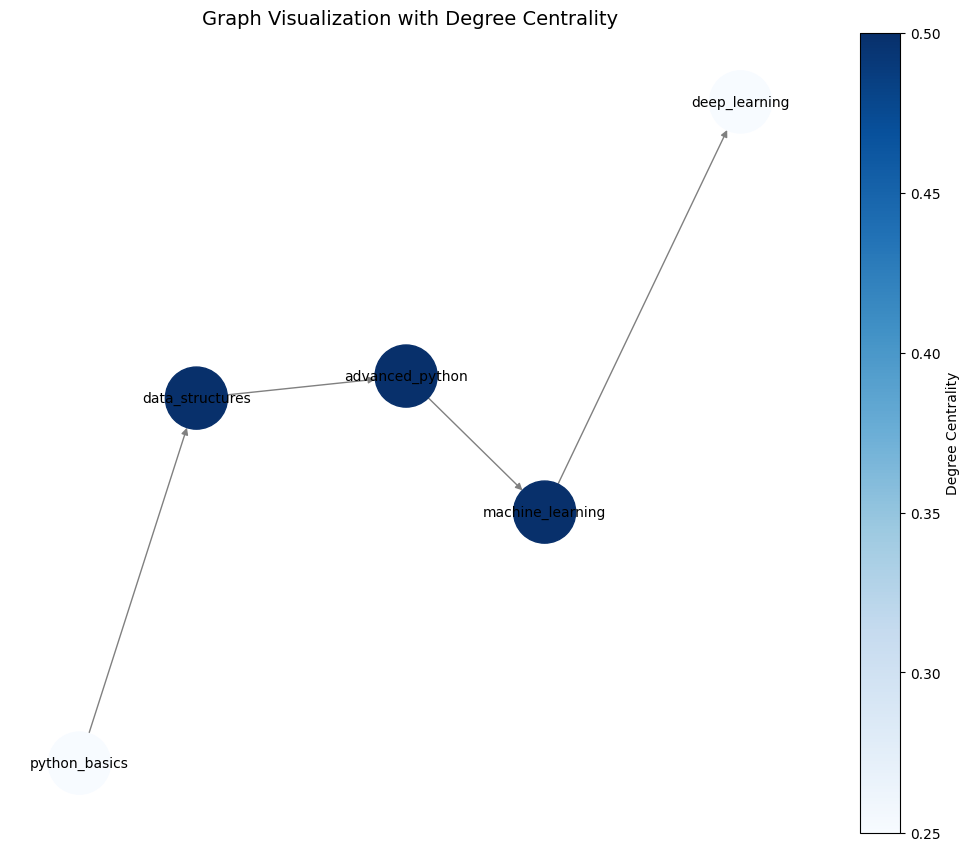

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    ('machine_learning', 'deep_learning', {'weight': 0.6})
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

# Calculate centrality measures
degree_cent = nx.degree_centrality(G)
print(f"Degree Centrality: {degree_cent}")
print("Degree Centrality: Measures the number of edges connected to a node. Nodes with higher degree centrality are well-connected.")

between_cent = nx.betweenness_centrality(G)
print(f"Betweenness Centrality: {between_cent}")
print("Betweenness Centrality: Measures how often a node lies on the shortest path between two other nodes. High betweenness centrality indicates a node is a key bridge in the network.")

close_cent = nx.closeness_centrality(G)
print(f"Closeness Centrality: {close_cent}")
print("Closeness Centrality: Measures how close a node is to all other nodes, based on the shortest paths. Higher closeness centrality means the node can reach others more quickly.")

# Define positions for nodes
pos = nx.spring_layout(G)

# Color nodes based on degree centrality
node_color_degree = [degree_cent[node] for node in G.nodes]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color=node_color_degree,
    node_size=2000, font_size=10, cmap=plt.cm.Blues, edge_color='gray'
)

# Degree centrality explanation
plt.title(f"Graph Visualization with Degree Centrality", fontsize=14)

# Add color bar for degree centrality
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(node_color_degree), vmax=max(node_color_degree)))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label="Degree Centrality")  # Specify ax here

# Show the plot
plt.show()

# Print centrality metrics and explanations



These following algorithms help understand graph structure <br>
Community detection finds related topics <br>
Path analysis shows all possible learning routes <br>
Cycle detection finds circular dependencies <br>
Components help identify isolated subgraphs

1. **Community Detection**: This algorithm groups nodes into communities where nodes within the same community are densely connected. It helps in understanding the modular structure of the graph.

--- Community Detection ---
Community detection identifies groups of nodes that are more connected to each other than to the rest of the network.
Detected communities (node groups):
Community 1: frozenset({'advanced_python', 'deep_learning', 'machine_learning'})
Community 2: frozenset({'data_structures', 'python_basics'})
2. **Path Analysis**: This finds all possible paths between two nodes. It is useful for exploring the possible routes in the network.

--- Path Analysis ---
All possible paths from 'python_basics' to 'machine_learning':
['python_basics', 'data_structures', 'advanced_python', 'machine_learning']
3. **Cycle Detection**: Detects cycles where nodes can return to themselves by following edges. Cycles are important in graph theory and can indicate dependencies or loops.

--- Cycle

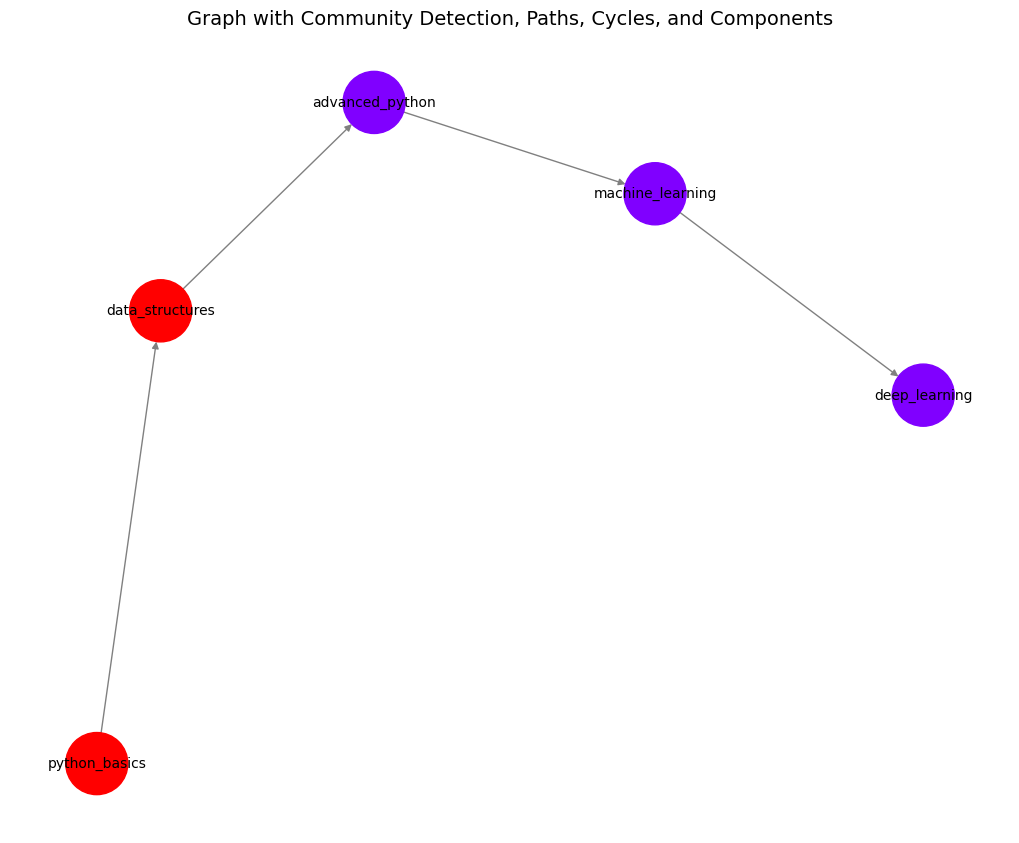

In [20]:
import networkx as nx
import matplotlib.pyplot as plt


# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    # Removed the edge causing the cycle
    # ('deep_learning', 'python_basics', {'weight': 0.5}),  # This was causing the cycle
    ('machine_learning', 'deep_learning', {'weight': 0.6}),  # Adjusted the flow
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

# Community detection (Greedy Modularity Communities)
communities = list(nx.community.greedy_modularity_communities(G))
print("1. **Community Detection**: This algorithm groups nodes into communities where nodes within the same community are densely connected. It helps in understanding the modular structure of the graph.")
print("\n--- Community Detection ---")
print("Community detection identifies groups of nodes that are more connected to each other than to the rest of the network.")
print("Detected communities (node groups):")
for idx, community in enumerate(communities):
    print(f"Community {idx + 1}: {community}")


# Path analysis
all_paths = list(nx.all_simple_paths(G, 'python_basics', 'machine_learning'))
print("2. **Path Analysis**: This finds all possible paths between two nodes. It is useful for exploring the possible routes in the network.")
print("\n--- Path Analysis ---")
print("All possible paths from 'python_basics' to 'machine_learning':")
for path in all_paths:
    print(path)

# Cycle detection
cycles = list(nx.simple_cycles(G))
print("3. **Cycle Detection**: Detects cycles where nodes can return to themselves by following edges. Cycles are important in graph theory and can indicate dependencies or loops.")
print("\n--- Cycle Detection ---")
print("Cycles detected in the graph (if any):")
if cycles:
    for cycle in cycles:
        print(f"Cycle: {cycle}")
else:
    print("No cycles detected.")

# Connected components
components = list(nx.connected_components(G.to_undirected()))
print("4. **Connected Components**: Identifies disconnected subgraphs (components). If a graph has more than one component, it means some nodes cannot be reached from others.")
print("\n--- Connected Components ---")
print("Connected components (disconnected subgraphs) in the graph:")
for component in components:
    print(f"Component: {component}")

# Visualization settings
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))

# Community detection visualization (color each community differently)
community_color_map = {}
for idx, community in enumerate(communities):
    for node in community:
        community_color_map[node] = idx

node_color_communities = [community_color_map.get(node, -1) for node in G.nodes]
nx.draw(
    G, pos, with_labels=True, node_color=node_color_communities,
    node_size=2000, font_size=10, cmap=plt.cm.rainbow, edge_color='gray'
)

# Highlight the cycles in the graph (with bold edges for visual clarity)
for cycle in cycles:
    cycle_edges = list(zip(cycle, cycle[1:] + [cycle[0]]))  # Create the cycle edges
    nx.draw_networkx_edges(G, pos, edgelist=cycle_edges, edge_color='red', width=3)

# Title
plt.title("Graph with Community Detection, Paths, Cycles, and Components", fontsize=14)

# Show the plot
plt.show()


## Other examples

Knowledge graphs have many practical applications
Recommendation systems use similarity measures
Dependency analysis helps in curriculum planning
Impact analysis helps in maintenance decisions
These are just a few examples of many possibilities

1. **Similar Topics Based on Connections (Jaccard Coefficient)**: Measures similarity between two nodes based on the proportion of shared neighbors in the graph.
2. **Prerequisites (Ancestors)**: Topics that need to be learned first before a given topic (i.e., prerequisites).
3. **Descendants**: Topics that depend on a given topic (i.e., topics that come later in the learning path).
4. **Impact of Removing a Node**: The number of topics that would be affected or no longer accessible if a node (topic) is removed from the graph.


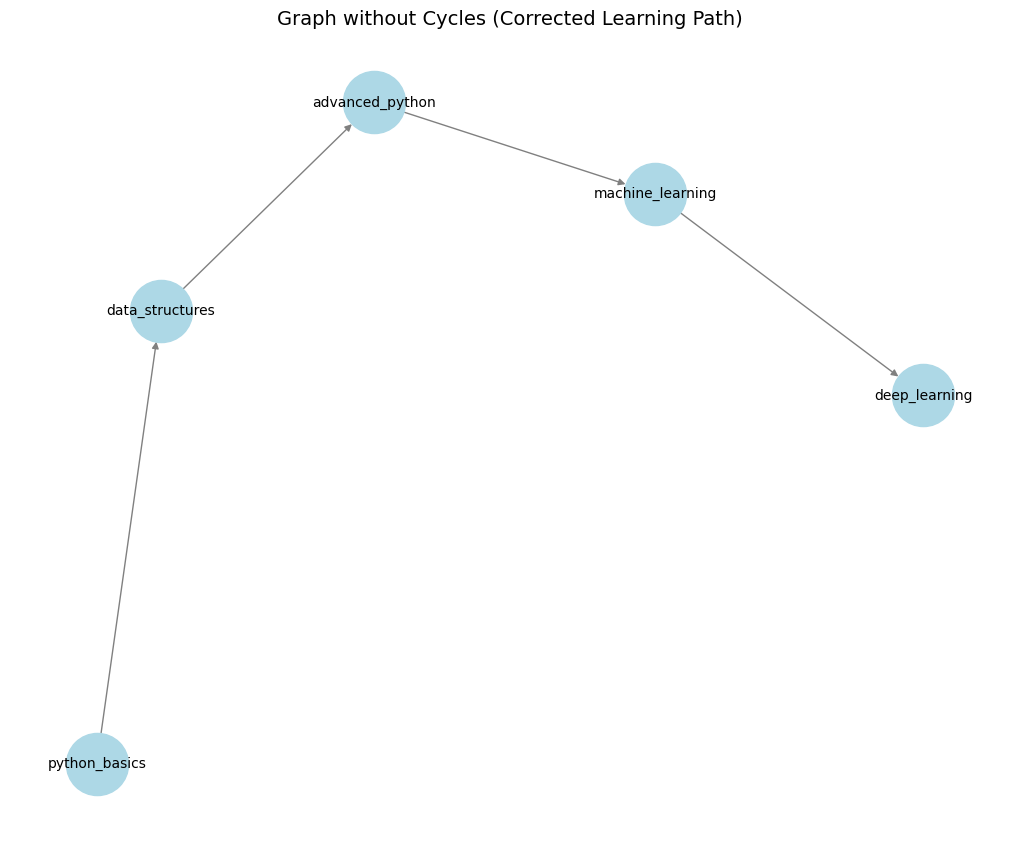


--- Similar Topics Based on Connections (Jaccard Coefficient) ---
The Jaccard coefficient measures the similarity between two nodes based on shared neighbors.
Similarity between 'data_structures' and 'machine_learning': 0.33

--- Prerequisites and Descendants ---
Prerequisites (ancestors) for 'machine_learning': {'data_structures', 'advanced_python', 'python_basics'}
Descendants (dependent topics) for 'python_basics': {'data_structures', 'advanced_python', 'deep_learning', 'machine_learning'}

--- Impact of Removing a Node ---
Impact of removing 'data_structures': 3 affected topics.


In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Topics and relationships
topics = {
    'python_basics': {'difficulty': 'beginner'},
    'data_structures': {'difficulty': 'intermediate'},
    'advanced_python': {'difficulty': 'advanced'},
    'machine_learning': {'difficulty': 'advanced'},
    'deep_learning': {'difficulty': 'advanced'}
}

relationships = [
    ('python_basics', 'data_structures', {'weight': 1.0}),
    ('data_structures', 'advanced_python', {'weight': 0.8}),
    ('advanced_python', 'machine_learning', {'weight': 0.7}),
    # Removed the edge causing the cycle
    # ('deep_learning', 'python_basics', {'weight': 0.5}),  # This was causing the cycle
    ('machine_learning', 'deep_learning', {'weight': 0.6}),  # Adjusted the flow
]

# Create the graph
G = nx.DiGraph()
for topic, metadata in topics.items():
    G.add_node(topic, **metadata)
G.add_edges_from(relationships)

# Convert the directed graph to an undirected one for Jaccard Coefficient calculation
G_undirected = G.to_undirected()

# Find similar topics using Jaccard Coefficient (now works on the undirected graph)
similar_topics = list(nx.jaccard_coefficient(G_undirected, [('data_structures', 'machine_learning')]))
print("1. **Similar Topics Based on Connections (Jaccard Coefficient)**: Measures similarity between two nodes based on the proportion of shared neighbors in the graph.")

# Check prerequisites (ancestors) and descendants
ancestors = nx.ancestors(G, 'machine_learning')
print("2. **Prerequisites (Ancestors)**: Topics that need to be learned first before a given topic (i.e., prerequisites).")

descendants = nx.descendants(G, 'python_basics')
print("3. **Descendants**: Topics that depend on a given topic (i.e., topics that come later in the learning path).")

# Find affected topics if a node is removed (e.g., 'data_structures')
impact = len(nx.descendants(G, 'data_structures'))
print("4. **Impact of Removing a Node**: The number of topics that would be affected or no longer accessible if a node (topic) is removed from the graph.")


# Visualization settings
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    G, pos, with_labels=True, node_color='lightblue',
    node_size=2000, font_size=10, edge_color='gray'
)

# Title
plt.title("Graph without Cycles (Corrected Learning Path)", fontsize=14)

# Show the plot
plt.show()

# Print explanations and results
print("\n--- Similar Topics Based on Connections (Jaccard Coefficient) ---")
print("The Jaccard coefficient measures the similarity between two nodes based on shared neighbors.")
for u, v, p in similar_topics:
    print(f"Similarity between '{u}' and '{v}': {p:.2f}")

print("\n--- Prerequisites and Descendants ---")
print(f"Prerequisites (ancestors) for 'machine_learning': {ancestors}")
print(f"Descendants (dependent topics) for 'python_basics': {descendants}")

print("\n--- Impact of Removing a Node ---")
print(f"Impact of removing 'data_structures': {impact} affected topics.")


